<a href="https://colab.research.google.com/github/mukul-B/DeepLearningCS687/blob/main/DLHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No handles with labels found to put in legend.


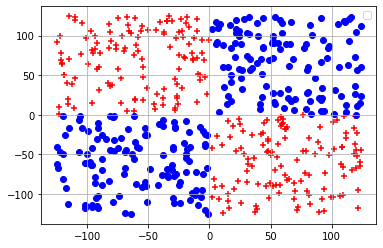

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=125
data = np.random.uniform(low=[-N, 0], high=[0, N], size=(N,2))
data2 = np.random.uniform(low=[0, -N], high=[N, 0], size=(N,2))
x = np.concatenate((data, data2),axis=0) 
xyz=np.array(np.random.randint(-N, 0, (N, 2)))
xyz2=np.array(np.random.randint(0, N, (N, 2)))
o = np.concatenate((xyz, xyz2),axis=0) 

plt.scatter(x[:,0], x[:,1],marker="+",c="red")
plt.scatter(o[:,0], o[:,1],marker="o",c="blue")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
y_x=np.array([[1,0] for i in range(len(x))])
y_o= np.array([[0,1] for i in range(len(o))])

x_train= x+o
y_train= y_x+ y_o
print(x_train.shape)

(250, 2)


In [3]:
from keras.layers.core.activation import Activation
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
input_shape = x_train.shape  
model.add(Dense(8,activation="relu",input_dim=2))

model.add(Dense(2,activation="sigmoid"))


In [4]:

model.build(input_shape) 
model.summary()
for layer in model.layers:
    print(layer.output_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
(None, 8)
(None, 2)


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=15, verbose = 1)

Epoch 1/3
17/17 [==============================] - 1s 2ms/step - loss: 19.9176 - accuracy: 0.2200
Epoch 2/3
17/17 [==============================] - 0s 4ms/step - loss: 15.8960 - accuracy: 0.2280
Epoch 3/3
17/17 [==============================] - 0s 4ms/step - loss: 12.1634 - accuracy: 0.2440


In [6]:

NT=150

x_test=o[np.random.randint(250, size=NT),:] + x[np.random.randint(250, size=NT),:]
y_test=y_o[:NT] + y_x[:NT]
score= model.evaluate(x_test,y_test)


5/5 [==============================] - 0s 3ms/step - loss: 15.5064 - accuracy: 0.4067


No handles with labels found to put in legend.


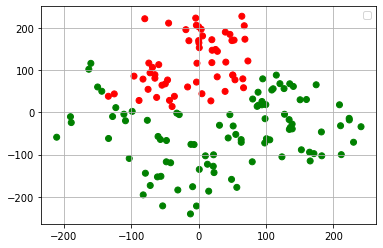

In [7]:
   
d= [ "red" if i[0] >i [1] else "green" for i in model.predict(x_test)]
plt.scatter(x_test[:,0], x_test[:,1],c=d)

plt.legend()
plt.grid(True)
plt.show()



In [ ]:

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(x_test)(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plot_decision_boundary(model, x_test,y_test) 